In [2]:
import numpy as np 
import pandas as pd 
from datetime import date, datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("smmh.csv")
df.head(2).T

,0,1
Timestamp,4/18/2022 19:18:47,4/18/2022 19:19:28
1. What is your age?,21.0,21.0
2. Gender,Male,Female
3. Relationship Status,In a relationship,Single
4. Occupation Status,University Student,University Student
5. What type of organizations are you affiliated with?,University,University
6. Do you use social media?,Yes,Yes
7. What social media platforms do you commonly use?,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord..."
8. What is the average time you spend on social media every day?,Between 2 and 3 hours,More than 5 hours
9. How often do you find yourself using Social media without a specific purpose?,5,4


In [4]:
col_names_dict = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship',
    '4. Occupation Status': 'occupation',
    '5. What type of organizations are you affiliated with?': 'affiliate_organization',
    '6. Do you use social media?': 'social_media_use',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'avg_time_per_day',
    '9. How often do you find yourself using Social media without a specific purpose?': 'without_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless',
    '12. On a scale of 1 to 5, how easily distracted are you?' : 'distracted_ease',
    '13. On a scale of 1 to 5, how much are you bothered by worries?' : 'worries',
    '14. Do you find it difficult to concentrate on things?' : 'concentration',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?' : 'compare_feelings',
    '17. How often do you look to seek validation from features of social media?' : 'validation',
    '18. How often do you feel depressed or down?' : 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?' : 'daily_activity_flux',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?' : 'sleeping_issues'
}

In [5]:
df.rename(columns=col_names_dict, inplace=True)
df.head(2).T

,0,1
timestamp,4/18/2022 19:18:47,4/18/2022 19:19:28
age,21.0,21.0
gender,Male,Female
relationship,In a relationship,Single
occupation,University Student,University Student
affiliate_organization,University,University
social_media_use,Yes,Yes
platforms,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord..."
avg_time_per_day,Between 2 and 3 hours,More than 5 hours
without_purpose,5,4


In [6]:
df.columns

Index(['timestamp', 'age', 'gender', 'relationship', 'occupation',
       'affiliate_organization', 'social_media_use', 'platforms',
       'avg_time_per_day', 'without_purpose', 'distracted', 'restless',
       'distracted_ease', 'worries', 'concentration', 'compare_to_others',
       'compare_feelings', 'validation', 'depressed', 'daily_activity_flux',
       'sleeping_issues'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.136590,9.915110,13.0,21.0,22.0,26.0,91.0
without_purpose,481.0,3.553015,1.096299,1.0,3.0,4.0,4.0,5.0
distracted,481.0,3.320166,1.328137,1.0,2.0,3.0,4.0,5.0
restless,481.0,2.588358,1.257059,1.0,2.0,2.0,3.0,5.0
distracted_ease,481.0,3.349272,1.175552,1.0,3.0,3.0,4.0,5.0
worries,481.0,3.559252,1.283356,1.0,3.0,4.0,5.0,5.0
concentration,481.0,3.245322,1.347105,1.0,2.0,3.0,4.0,5.0
compare_to_others,481.0,2.831601,1.407835,1.0,2.0,3.0,4.0,5.0
compare_feelings,481.0,2.775468,1.056479,1.0,2.0,3.0,3.0,5.0
validation,481.0,2.455301,1.247739,1.0,1.0,2.0,3.0,5.0


In [8]:
print([f"Nan values in: {(element, value)}" for (element, value) in zip(df.isnull().sum().index, df.isnull().sum()) if value > 0])

["Nan values in: ('affiliate_organization', 30)"]


In [9]:
f"Percent NaN = {df.affiliate_organization.isnull().sum()/len(df.affiliate_organization)*100:0.2f} %"

'Percent NaN = 6.24 %'

As only the categorical column ("affiliate_organization") has NaN values in it and these NaN values make up only 6% of all the values in this column, fill the NaN values with the most common category for the column "affiliate_organization":

In [10]:
df.affiliate_organization.fillna(df['affiliate_organization'].value_counts().index[0], inplace=True)

In [11]:
df.gender.value_counts()

Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: gender, dtype: int64

In [12]:
df.gender = df.gender.apply(lambda x: x if x in ["Male","Female"] else "other")

In [13]:
df.gender.value_counts()

Female    263
Male      211
other       7
Name: gender, dtype: int64

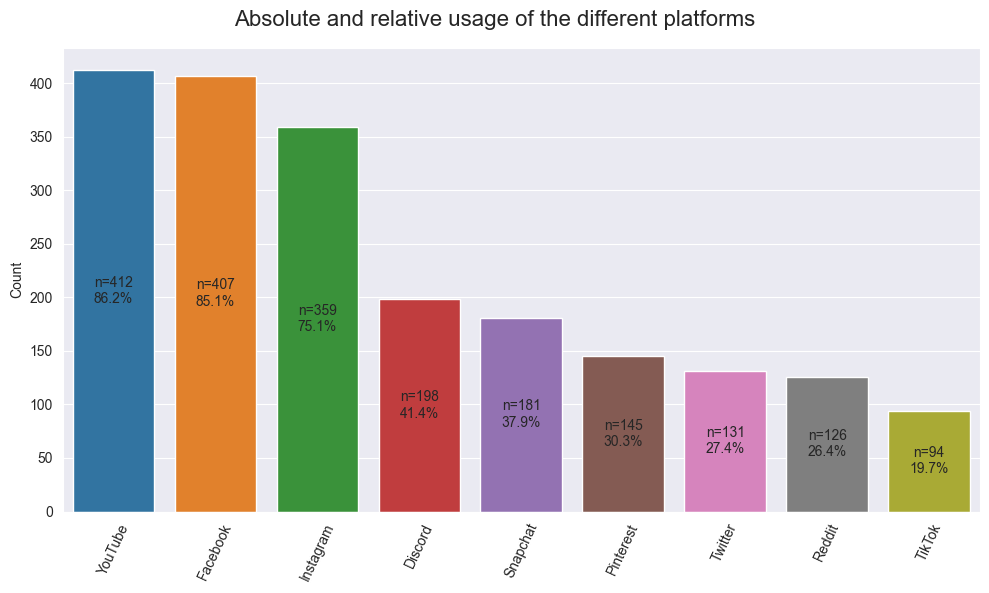

In [14]:
#getting the number of people saying, they are using social media
maxval = df[df.social_media_use == 'Yes'].iloc[:,0].count()

#make the plot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df, x=df.platforms.str.split(', ', expand=True).stack().value_counts().index,
            y=df.platforms.str.split(', ', expand=True).stack().value_counts(), 
            ax=ax)
fig.suptitle("Absolute and relative usage of the different platforms", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=65)

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    percent = (h/maxval)*100
    ax.annotate(text=f'n={h:0.0f}\n{percent:0.1f}%', xy=xy, ha='center', va='center')
    
plt.tight_layout();

In [15]:
#generating usable data structure
df_platform = pd.concat([df[["age", "gender", "relationship", "occupation",
                             "affiliate_organization", "avg_time_per_day", 
                             "without_purpose", "distracted", "restless", 
                             "distracted_ease", "worries", "concentration",
                             "compare_to_others", "compare_feelings", 
                             "validation", "depressed", "daily_activity_flux",
                             "sleeping_issues"]], 
                             df.platforms.str.split(', ', expand=True)], axis=1)

platform_list = []
for list in df_platform.iloc[0:,18:].values:
    for entry in list:
        platform_list.append(entry)
platform_set = set(platform_list)
platform_list = [element for element in platform_set if element != None]
df_platform[platform_list] = np.nan

# generating a one hot encoded matrix for Usage
for element in platform_list:
    df_platform.loc[df_platform[(df_platform.loc[0:,0:] == element).any(axis=1)].index, element] = 1

df_platform.drop(labels=[0,1,2,3,4,5,6,7,8], axis=1, inplace=True)
df_platform.head(2)

,age,gender,relationship,occupation,affiliate_organization,avg_time_per_day,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues,Twitter,TikTok,YouTube,Instagram,Discord,Pinterest,Snapchat,Reddit,Facebook
0,21.0,Male,In a relationship,University Student,University,Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0
1,21.0,Female,Single,University Student,University,More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0


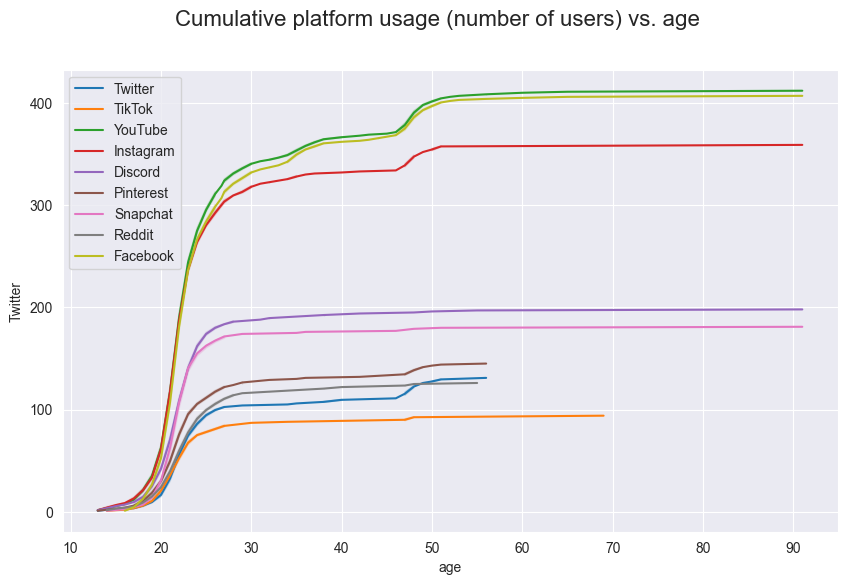

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

for platform in platform_list:
    sns.lineplot(x=df_platform.sort_values(by=['age'])["age"], y=df_platform.sort_values(by=['age'])[platform].cumsum(), ax=ax, label=platform)
fig.suptitle("Cumulative platform usage (number of users) vs. age", fontsize=16);

In [17]:
df_20 = df_platform.query("age <= 20")
df_21_30 = df_platform.query("age > 20 & age <=30")
df_31_40 = df_platform.query("age > 30 & age <=40")
df_40 = df_platform.query("age > 40")
print(f"Age below 20: n={len(df_20)}")
print(f"Age 21 to 30: n={len(df_21_30)}")
print(f"Age 31 to 40: n={len(df_31_40)}")
print(f"Age above 40: n={len(df_40)}")

Age below 20: n=96
Age 21 to 30: n=296
Age 31 to 40: n=33
Age above 40: n=56


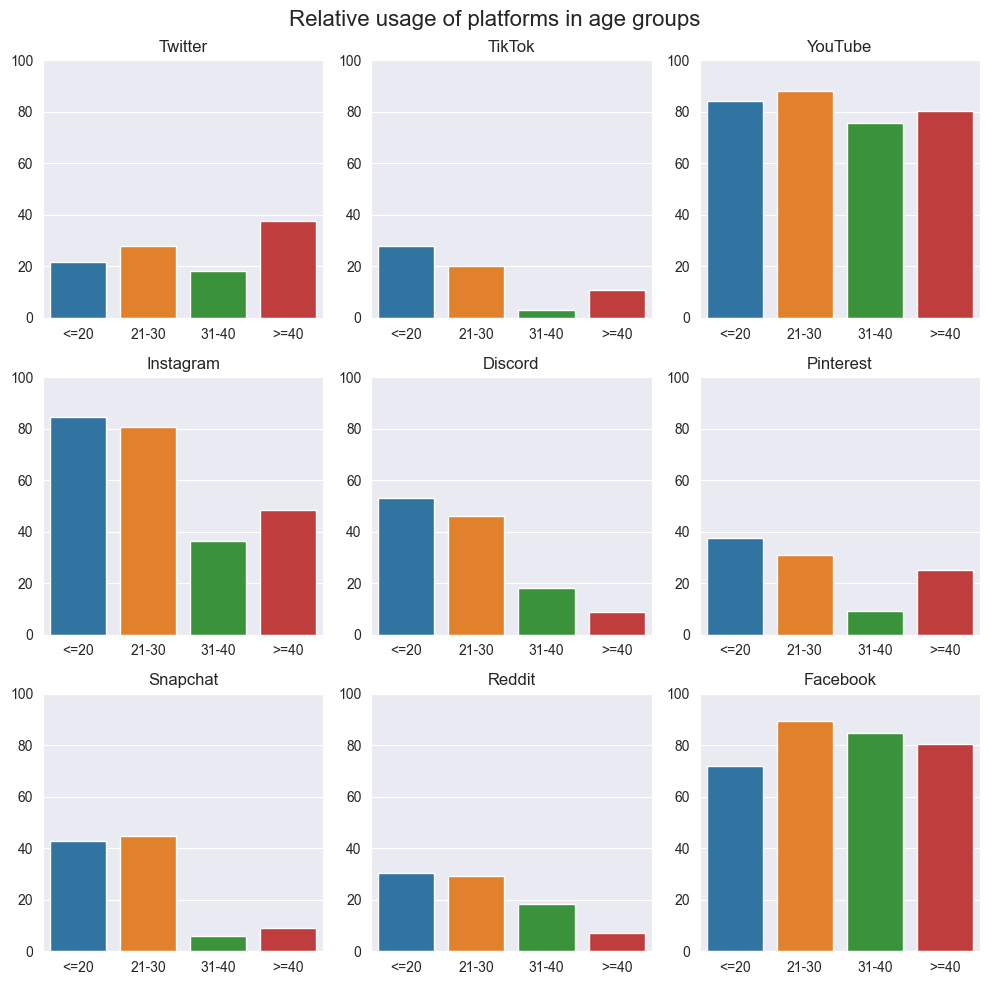

In [18]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.flatten()

for (ax, platform) in zip(axes, platform_list):
    x_list = ["<=20","21-30","31-40",">=40"]
    percent20 = df_20[platform].sum()/len(df_20)*100
    percent2130 = df_21_30[platform].sum()/len(df_21_30)*100
    percent3140 = df_31_40[platform].sum()/len(df_31_40)*100
    percent40 = df_40[platform].sum()/len(df_40)*100
    y_list = [percent20, percent2130, percent3140, percent40]
    sns.barplot(x=x_list, y=y_list, ax=ax)
    ax.set_ylim(0,100)
    ax.set_title(platform)
fig.suptitle("Relative usage of platforms in age groups", fontsize=16)
plt.tight_layout()

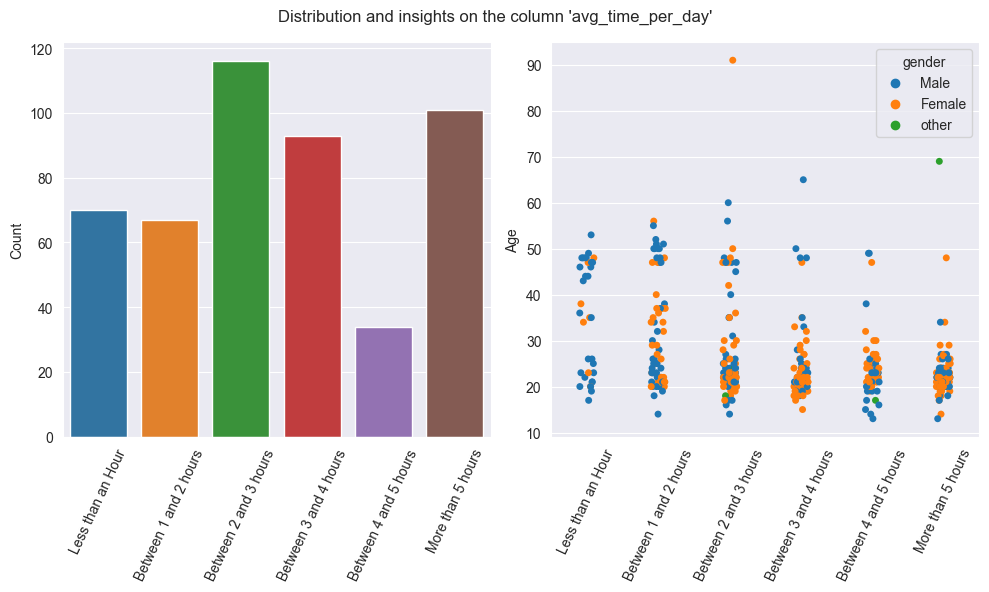

In [19]:
orderlist = ['Less than an Hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours',
         'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours']

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.barplot(data=df, x=df.avg_time_per_day.unique(), y=df.avg_time_per_day.value_counts(), ax=ax[0], order=orderlist)
ax[1] = sns.stripplot(data=df, x=df.avg_time_per_day, y=df.age, hue="gender", order=orderlist)
fig.suptitle("Distribution and insights on the column 'avg_time_per_day'")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("")
ax[1].set_ylabel("Age")
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout();

In [20]:
#Column "platforms_sum" contains the integer value for the number of different platforms used by a user. 
#Column named "impact_sum" contains the sum of the answers from the survey, as a higher numer indicates more negative impact.
df_platform["platform_sum"] = 0
for platform in platform_list:
    df_platform["platform_sum"] = df_platform["platform_sum"] + df_platform[platform].fillna(0).astype(int)

df_platform["impact_sum"] = 0
df_platform["impact_sum"] = df_platform["without_purpose"] + df_platform["distracted"] + df_platform["restless"] + df_platform["distracted_ease"] + df_platform["worries"] + df_platform["concentration"] + df_platform["compare_to_others"] + df_platform["compare_feelings"] + df_platform["validation"] + df_platform["depressed"] + df_platform["daily_activity_flux"] + df_platform["sleeping_issues"]
df_platform.head()

,age,gender,relationship,occupation,affiliate_organization,avg_time_per_day,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues,Twitter,TikTok,YouTube,Instagram,Discord,Pinterest,Snapchat,Reddit,Facebook,platform_sum,impact_sum
0,21.0,Male,In a relationship,University Student,University,Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,6,43
1,21.0,Female,Single,University Student,University,More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,6,43
2,21.0,Female,Single,University Student,University,Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,4,35
3,21.0,Female,Single,University Student,University,More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2,35
4,21.0,Female,Single,University Student,University,Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,3,44


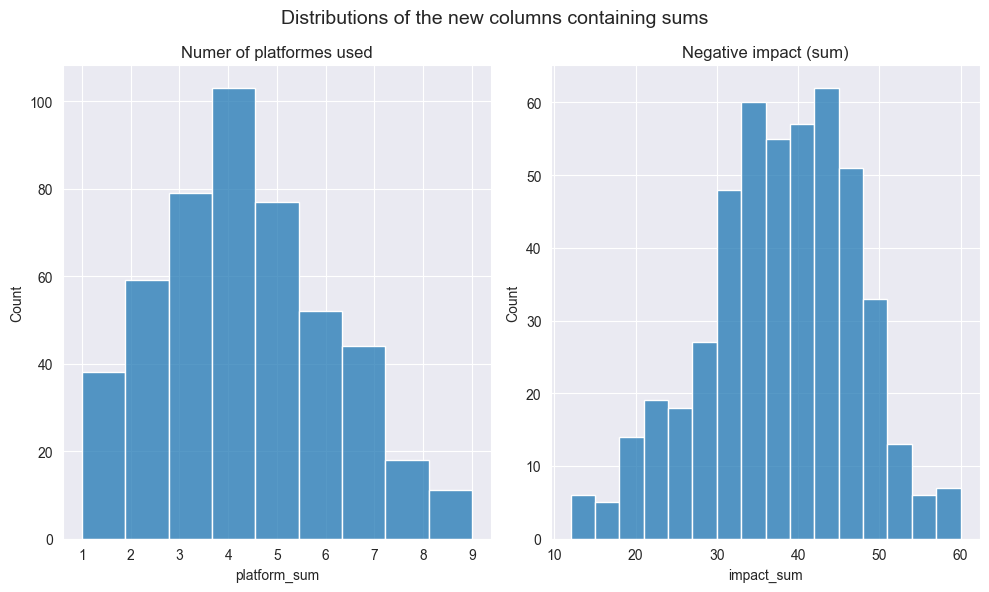

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(data = df_platform, x="platform_sum", ax=ax[0], bins=9)
sns.histplot(data = df_platform, x="impact_sum", ax=ax[1])
fig.suptitle("Distributions of the new columns containing sums", fontsize=14)
ax[0].set_title("Numer of platformes used")
ax[1].set_title("Negative impact (sum)")
plt.tight_layout();

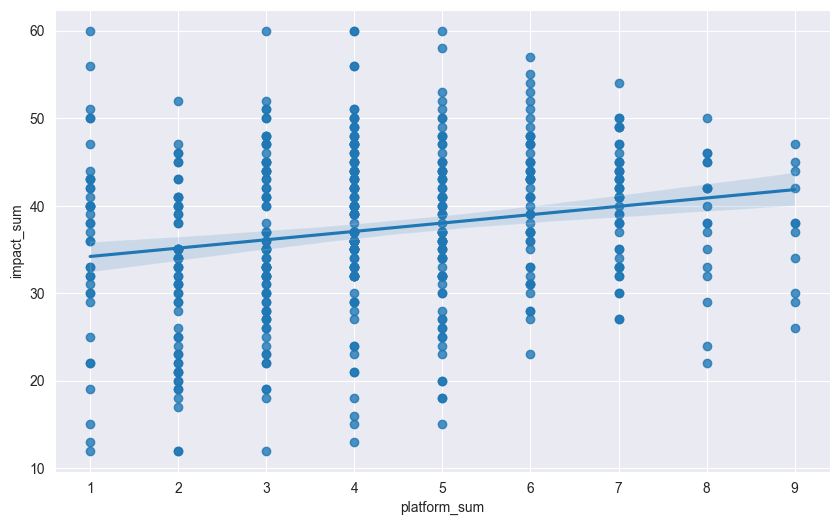

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x=df_platform.platform_sum, y=df_platform.impact_sum, ax=ax);

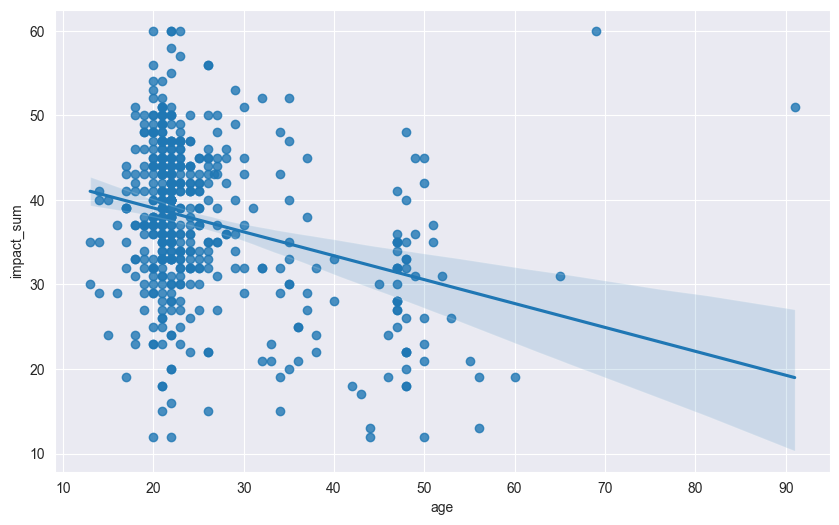

In [23]:

fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x=df_platform.age, y=df_platform.impact_sum, ax=ax);

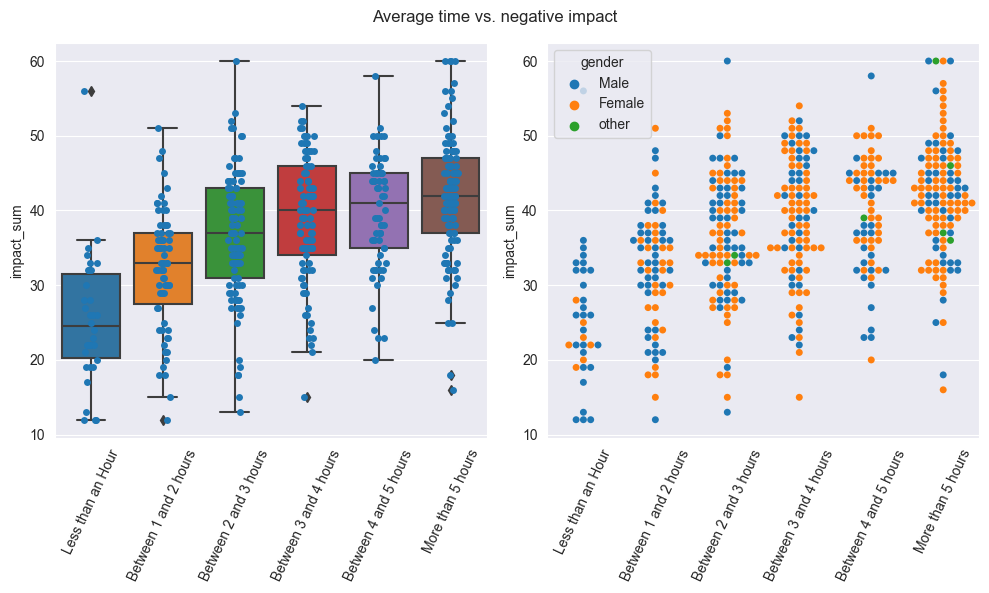

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.stripplot(x=df_platform.avg_time_per_day, y=df_platform.impact_sum, ax=ax[0], order=orderlist)
sns.boxplot(x=df_platform.avg_time_per_day,  y=df_platform.impact_sum, ax=ax[0], order=orderlist)
sns.swarmplot(x=df_platform.avg_time_per_day,  y=df_platform.impact_sum, ax=ax[1], order=orderlist, hue=df_platform.gender)
ax[0].tick_params(axis='x', rotation=65)
ax[0].set_xlabel("")
ax[1].tick_params(axis='x', rotation=65)
ax[1].set_xlabel("")
fig.suptitle("Average time vs. negative impact")
plt.tight_layout();

Here a correlation is obvious. From "less than a hour" up to "Between 3-4 hours" we can see a growing negative impact onmental health,
driven by the usage time. More than 4 hours on social media seem to have no futher impact.

# Predicting the risk for mental health 

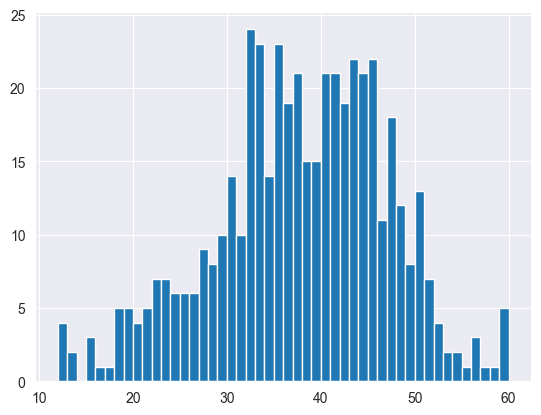

In [25]:
df_platform.impact_sum.hist(bins=48);

value for "impact_sum" is 12, the max. value is 60 as we can see from the histogram. So lower half goes from 12-36 and the second half goes from 37-60 Added this class to the dataframe as the new column named: "risk"

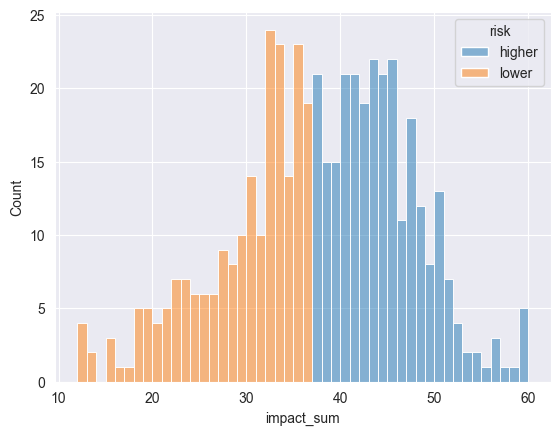

In [26]:
df_platform["risk"] = "lower"
df_platform.loc[df_platform[df_platform.impact_sum >= 37].index, "risk"] = "higher"
df_platform.risk = df_platform.risk.astype("category")
sns.histplot(x=df_platform.impact_sum, bins=48, hue=df_platform.risk);


predict the higher or lower risk only based on the values for "age", "gender", "relationship", "avg_time_per_day" and the usage of the different social media platforms. The model should predict the high or low risk only knowing the platforms used, the average time per day and "age", "gender", "relationship".

In [27]:
df.columns

Index(['timestamp', 'age', 'gender', 'relationship', 'occupation',
       'affiliate_organization', 'social_media_use', 'platforms',
       'avg_time_per_day', 'without_purpose', 'distracted', 'restless',
       'distracted_ease', 'worries', 'concentration', 'compare_to_others',
       'compare_feelings', 'validation', 'depressed', 'daily_activity_flux',
       'sleeping_issues'],
      dtype='object')

In [28]:
df_platform.columns

Index(['age', 'gender', 'relationship', 'occupation', 'affiliate_organization',
       'avg_time_per_day', 'without_purpose', 'distracted', 'restless',
       'distracted_ease', 'worries', 'concentration', 'compare_to_others',
       'compare_feelings', 'validation', 'depressed', 'daily_activity_flux',
       'sleeping_issues', 'Twitter', 'TikTok', 'YouTube', 'Instagram',
       'Discord', 'Pinterest', 'Snapchat', 'Reddit', 'Facebook',
       'platform_sum', 'impact_sum', 'risk'],
      dtype='object')

In [29]:
df_platform['depressed']

0      5
1      5
2      4
3      4
4      4
      ..
476    3
477    4
478    2
479    4
480    2
Name: depressed, Length: 481, dtype: int64

In [30]:
df_platform = df_platform.replace(np.nan, 0)

label = "depressed"
features = ["age", "gender", "relationship", "avg_time_per_day", "Pinterest", "YouTube", "Reddit", "TikTok", "Instagram", "Facebook", "Snapchat", "Discord", "risk"]
target = df_platform[label]
data = df_platform[features]
data.shape, target.shape

((481, 13), (481,))

In [58]:
df_platform.head()

,age,gender,relationship,occupation,affiliate_organization,avg_time_per_day,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues,Twitter,TikTok,YouTube,Instagram,Discord,Pinterest,Snapchat,Reddit,Facebook,platform_sum,impact_sum,risk
0,21.0,Male,In a relationship,University Student,University,Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,6,43,higher
1,21.0,Female,Single,University Student,University,More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,6,43,higher
2,21.0,Female,Single,University Student,University,Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4,35,lower
3,21.0,Female,Single,University Student,University,More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,35,lower
4,21.0,Female,Single,University Student,University,Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3,44,higher


In [31]:
my_label_enc = LabelEncoder()
one_hot_enc = OneHotEncoder()

In [32]:
enc_list = ["gender", "relationship", "avg_time_per_day", "risk"]
target = my_label_enc.fit_transform(target)
df_encoded = pd.get_dummies(data[enc_list]).astype(int)
data = pd.concat([data.drop(columns=enc_list), df_encoded], axis=1)

In [33]:
data

,age,Pinterest,YouTube,Reddit,TikTok,Instagram,Facebook,Snapchat,Discord,gender_Female,gender_Male,gender_other,relationship_Divorced,relationship_In a relationship,relationship_Married,relationship_Single,avg_time_per_day_Between 1 and 2 hours,avg_time_per_day_Between 2 and 3 hours,avg_time_per_day_Between 3 and 4 hours,avg_time_per_day_Between 4 and 5 hours,avg_time_per_day_Less than an Hour,avg_time_per_day_More than 5 hours,risk_higher,risk_lower
0,21.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,21.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,21.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,21.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,21.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
477,26.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
478,29.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
479,21.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [34]:
data_copy = pd.concat([data, pd.DataFrame(target, columns=['depressed'])], axis=1)

<AxesSubplot: >

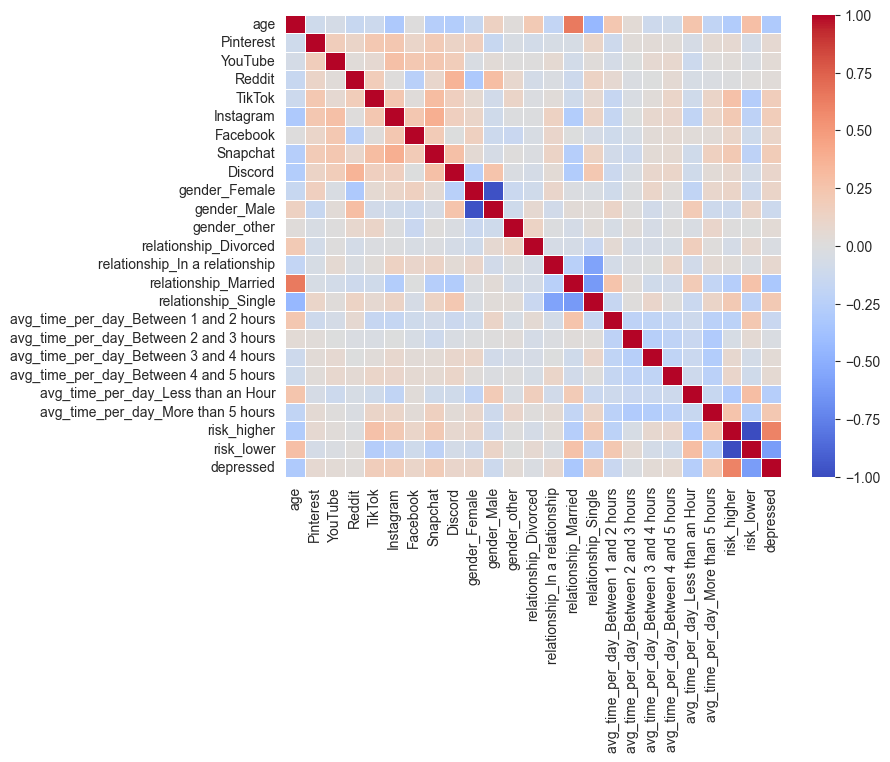

In [35]:
correlation_matrix = data_copy.corr()
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [37]:
# Initialize PCA and specify the number of components
pca = PCA(n_components=6)  # Reduce the data to 2 principal components

# Fit PCA on the scaled data and transform the data
X_pca = pca.fit_transform(X_scaled)

# The transformed dataset is now in a 2D space
print("Transformed Data (first 5 rows):")
print(X_pca[:5])

Transformed Data (first 5 rows):
[[-0.56193765 -1.60692603 -1.07344761  1.13330192  1.93453122 -1.61848119]
 [-1.96361838 -0.14793653  1.07473232  0.17998661  0.11974971  0.59432565]
 [-0.21238419  1.24725467 -0.16947915 -2.93050049 -0.71548175  0.36943318]
 [ 0.27527605  1.38470472  1.73803438 -0.93237259  0.80851049  1.83414848]
 [-0.94286143  1.33271668  1.40271546 -0.57750118 -0.18989298 -0.79531341]]


In [38]:
# Explained variance ratio
print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)

# Cumulative explained variance
print("Cumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio for each component:
[0.1625143  0.10362688 0.07392818 0.06639028 0.05785542 0.05606487]
Cumulative explained variance:
[0.1625143  0.26614118 0.34006936 0.40645964 0.46431506 0.52037993]


In [66]:
x = data.drop(labels=['risk_higher','risk_lower'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=43, stratify=target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 22), (97, 22), (384,), (97,))

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
y_test = y_train
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
X_test = X_train
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# Initialize individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
nb_clf = MultinomialNB()

# Create the ensemble classifier with a soft voting mechanism
ensemble_clf = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('xgboost', xgb_clf),
        ('naive_bayes', nb_clf)
    ],
    voting='soft'  # 'soft' voting for probability-based averaging
)


In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for RandomForest
rf_param_grid = {
    'random_forest__n_estimators': [50, 100, 150],
    'random_forest__max_depth': [10, 20, 30, 50],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for XGBoost
xgb_param_grid = {
    'xgboost__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'xgboost__n_estimators': [50, 100, 150],
    'xgboost__max_depth': [1, 3, 6, 9],
    'xgboost__subsample': [0.8, 1.0, 2.0],
    'xgboost__colsample_bytree': [0.8, 1.0, 2.0]
}

# Parameter grid for Naive Bayes
nb_param_grid = {
    'naive_bayes__alpha': [0.01, 0.1, 0.5, 1.0, 2.0]
}
# Combine all parameter grids into a single dictionary
param_grid = {**rf_param_grid, **xgb_param_grid, **nb_param_grid}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ensemble_clf,
    param_distributions=param_grid,
    n_iter=50,  # Number of different parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can adjust the scoring method based on your goal
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", random_search.best_params_)

# Evaluate on the test set
print("Test set accuracy: ", random_search.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Eesha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
145 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Eesha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Eesha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Eesha\AppData\Local\Programs\Python\Python310\lib\site-packa

Best hyperparameters found:  {'xgboost__subsample': 0.8, 'xgboost__n_estimators': 50, 'xgboost__max_depth': 9, 'xgboost__learning_rate': 0.1, 'xgboost__colsample_bytree': 1.0, 'random_forest__n_estimators': 50, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 2, 'random_forest__max_depth': 50, 'naive_bayes__alpha': 0.5}
Test set accuracy:  0.8463541666666666


In [70]:
y_pred = random_search.predict(X_test)

In [71]:
y_pred

array([4, 2, 3, 0, 2, 3, 4, 3, 1, 3, 4, 3, 3, 4, 2, 2, 3, 4, 4, 4, 2, 1,
       1, 3, 2, 1, 0, 1, 0, 4, 1, 3, 3, 3, 3, 0, 3, 4, 2, 1, 0, 3, 1, 2,
       1, 1, 1, 1, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       3, 0, 1, 3, 4, 1, 4, 1, 2, 0, 2, 4, 2, 0, 3, 4, 0, 2, 0, 0, 2, 3,
       1, 3, 3, 4, 3, 3, 3, 2, 1, 0, 2, 2, 4, 3, 4, 4, 2, 0, 4, 2, 0, 2,
       4, 3, 3, 0, 0, 0, 4, 1, 4, 2, 3, 4, 2, 2, 3, 3, 2, 2, 4, 1, 3, 0,
       4, 0, 0, 2, 1, 4, 2, 3, 2, 3, 0, 2, 2, 2, 1, 1, 3, 3, 2, 2, 2, 4,
       0, 4, 1, 4, 4, 4, 0, 3, 2, 4, 0, 3, 3, 3, 2, 3, 3, 3, 1, 0, 3, 2,
       4, 1, 2, 4, 0, 1, 0, 2, 2, 0, 2, 3, 0, 4, 4, 3, 3, 2, 0, 4, 4, 2,
       2, 4, 2, 1, 4, 0, 4, 4, 0, 0, 0, 3, 4, 3, 4, 4, 2, 3, 4, 2, 4, 2,
       3, 3, 3, 4, 1, 4, 2, 0, 3, 4, 4, 0, 4, 2, 1, 3, 3, 3, 4, 4, 4, 4,
       2, 2, 3, 4, 3, 3, 1, 4, 4, 3, 3, 1, 3, 1, 4, 0, 3, 2, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 3, 4, 4, 2, 4, 4, 1, 1, 3, 3, 4, 1, 0, 4, 3, 4, 4,
       1, 2, 3, 1, 3, 2, 2, 3, 1, 1, 0, 3, 4, 2, 3,

In [72]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        48
           1       0.88      0.70      0.78        66
           2       0.91      0.83      0.87        93
           3       0.84      0.95      0.89        93
           4       0.83      0.93      0.88        84

    accuracy                           0.85       384
   macro avg       0.84      0.83      0.83       384
weighted avg       0.85      0.85      0.84       384



In [73]:
random_search.predict(X_test)[5]

3

In [74]:
y_test[5]

3

In [75]:
target_test_pred = random_search.predict(X_test)

In [76]:
acc_test = accuracy_score(y_test, target_test_pred) * 100
print (f'Modell: {random_search} -- Test -- Accuracy: {acc_test:5.1f}%')

Modell: RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('random_forest',
                                                           RandomForestClassifier(random_state=42)),
                                                          ('xgboost',
                                                           XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_

[1, 2, 3, 4, 5]


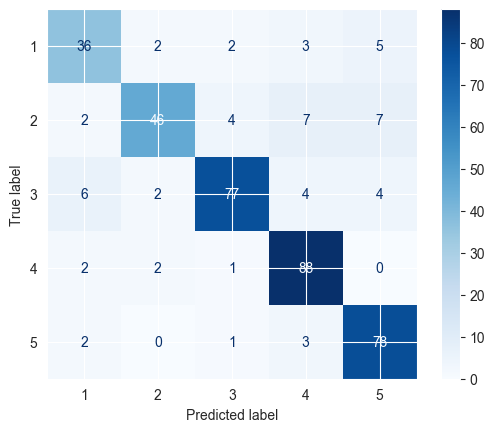

In [77]:
plotlabel = my_label_enc.inverse_transform([0,1, 2, 3, 4])
conf_matrix = confusion_matrix(y_test, target_test_pred)
display_labels_= [plotlabel[0], plotlabel[1], plotlabel[2], plotlabel[3], plotlabel[4]]
print(display_labels_)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels_)
disp.plot(cmap='Blues')

This model can predict the risk for negative mental health impact only based on the age, the gender, the relationship status, the daily average time on social media and the platforms used with an accuracy of 87% and an F1-score of 0.86.

In [78]:
X_test

,age,Pinterest,YouTube,Reddit,TikTok,Instagram,Facebook,Snapchat,Discord,gender_Female,gender_Male,gender_other,relationship_Divorced,relationship_In a relationship,relationship_Married,relationship_Single,avg_time_per_day_Between 1 and 2 hours,avg_time_per_day_Between 2 and 3 hours,avg_time_per_day_Between 3 and 4 hours,avg_time_per_day_Between 4 and 5 hours,avg_time_per_day_Less than an Hour,avg_time_per_day_More than 5 hours
237,22.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0
436,22.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1
362,21.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0
213,22.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0
316,24.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,48.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0
75,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0
254,20.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,1,0,0,0,0,1,0,0,0,0,1,0
435,22.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0


Accuracy scores:

rf_model: 0.9878

xgb_model: 0.9585

log_model: 0.9073

nb_model: 0.8634

svm_model: 0.9512

In [79]:
import joblib, json

joblib.dump(pca, 'model/pca.pkl')  # PCA model
joblib.dump(rf_clf, 'model/model.pkl')  # Best model = Random Forest
joblib.dump(my_label_enc, 'model/label_encoder.pkl')  # Label encoder used
del list
json.dump(list(X_train.columns), open('model/onehot_columns.json', 'w'))  # One-hot encoded column names

NameError: name 'list' is not defined

In [80]:
rf_clf.fit(X_train, y_train)
joblib.dump(rf_clf, 'model/model.pkl')

['model/model.pkl']

In [81]:
df_platform["risk"] = "lower"
df_platform.loc[df_platform.impact_sum >= 37, "risk"] = "higher"
df_platform["risk"] = df_platform["risk"].astype("category")

# Example model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features_for_risk = ["age", "Pinterest", "YouTube", "Reddit", "TikTok", "Instagram", "Facebook", "Snapchat", "Discord", "gender", "relationship", "avg_time_per_day"]
df_risk = df_platform[features_for_risk + ["risk"]].dropna()

X = pd.get_dummies(df_risk.drop(columns=["risk"]))
y = df_risk["risk"].apply(lambda x: 1 if x == "higher" else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train and save the risk model
risk_model = RandomForestClassifier()
risk_model.fit(X_train, y_train)

import joblib
joblib.dump(risk_model, 'model/risk_model.pkl')


['model/risk_model.pkl']

In [82]:
data

,age,Pinterest,YouTube,Reddit,TikTok,Instagram,Facebook,Snapchat,Discord,gender_Female,gender_Male,gender_other,relationship_Divorced,relationship_In a relationship,relationship_Married,relationship_Single,avg_time_per_day_Between 1 and 2 hours,avg_time_per_day_Between 2 and 3 hours,avg_time_per_day_Between 3 and 4 hours,avg_time_per_day_Between 4 and 5 hours,avg_time_per_day_Less than an Hour,avg_time_per_day_More than 5 hours,risk_higher,risk_lower
0,21.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,21.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,21.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,21.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,21.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
477,26.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
478,29.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
479,21.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [62]:
feature_columns = list(X_train.columns)
# Save this list in a file or inside your code
print(feature_columns)

['age', 'Pinterest', 'YouTube', 'Reddit', 'TikTok', 'Instagram', 'Facebook', 'Snapchat', 'Discord', 'gender_Female', 'gender_Male', 'gender_other', 'relationship_Divorced', 'relationship_In a relationship', 'relationship_Married', 'relationship_Single', 'avg_time_per_day_Between 1 and 2 hours', 'avg_time_per_day_Between 2 and 3 hours', 'avg_time_per_day_Between 3 and 4 hours', 'avg_time_per_day_Between 4 and 5 hours', 'avg_time_per_day_Less than an Hour', 'avg_time_per_day_More than 5 hours']


In [83]:
rf_clf.predict(X_test)

array([1, 4, 4, 4, 3, 4, 1, 4, 3, 2, 1, 2, 2, 4, 4, 2, 4, 0, 2, 3, 1, 4,
       0, 1, 0, 4, 3, 4, 3, 4, 4, 2, 2, 0, 4, 2, 4, 2, 1, 2, 4, 1, 3, 4,
       0, 4, 0, 4, 2, 4, 4, 0, 2, 3, 4, 1, 3, 4, 0, 1, 1, 3, 4, 0, 4, 3,
       1, 3, 3, 4, 2, 4, 0, 3, 3, 0, 0, 2, 3, 1, 4, 2, 2, 2, 1, 1, 3, 2,
       1, 0, 4, 2, 4, 3, 3, 2, 2, 0, 3, 1, 4, 2, 0, 4, 3, 3, 3, 3, 2, 2,
       3, 4, 2, 4, 3, 3, 0, 3, 0, 2, 1], dtype=int64)